# Carbon Footprint Optimization in Supply Chain Logistics


### Data Preprocessing

**Given the nature of the dataset, we'll perform the following preprocessing** 

**Load the dataset.**

**Handle missing values.**

**Encode categorical variables.**

**Normalize numerical features.**

**Split the data into training and testing sets**


In [2]:
import pandas as pd
data = pd.read_csv('/kaggle/input/supply-chain-greenhouse-gas-emission/SupplyChainGHGEmissionFactors_v1.2_NAICS_CO2e_USD2021.csv')

print(data.head())

   2017 NAICS Code                  2017 NAICS Title       GHG  \
0           111110                   Soybean Farming  All GHGs   
1           111120  Oilseed (except Soybean) Farming  All GHGs   
2           111130          Dry Pea and Bean Farming  All GHGs   
3           111140                     Wheat Farming  All GHGs   
4           111150                      Corn Farming  All GHGs   

                                Unit  \
0  kg CO2e/2021 USD, purchaser price   
1  kg CO2e/2021 USD, purchaser price   
2  kg CO2e/2021 USD, purchaser price   
3  kg CO2e/2021 USD, purchaser price   
4  kg CO2e/2021 USD, purchaser price   

   Supply Chain Emission Factors without Margins  \
0                                          1.223   
1                                          1.223   
2                                          2.874   
3                                          2.874   
4                                          2.874   

   Margins of Supply Chain Emission Factors  \
0 

## Model Training and Visualization

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np

df = pd.read_csv("/kaggle/input/supply-chain-greenhouse-gas-emission/SupplyChainGHGEmissionFactors_v1.2_NAICS_CO2e_USD2021.csv")

df = df[[
    '2017 NAICS Code',
    '2017 NAICS Title',
    'Supply Chain Emission Factors without Margins',
    'Margins of Supply Chain Emission Factors',
    'Supply Chain Emission Factors with Margins'
]]

df = df.dropna(subset=['Supply Chain Emission Factors with Margins'])

X = df.drop('Supply Chain Emission Factors with Margins', axis=1)
y = df['Supply Chain Emission Factors with Margins']


categorical_features = ['2017 NAICS Title']
numerical_features = ['2017 NAICS Code',
                      'Supply Chain Emission Factors without Margins',
                      'Margins of Supply Chain Emission Factors']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model_pipeline.fit(X_train, y_train)

# Predict
y_pred = model_pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ MAE: {mae:.4f}")
print(f"✅ RMSE: {rmse:.4f}")


✅ MAE: 0.0424
✅ RMSE: 0.5334


# Interpretation:

**The model has very low error, especially considering the emission values range from ~0.01 to ~11.**

**Less than 1.5% average error makes this model highly accurate for emission estimation.**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


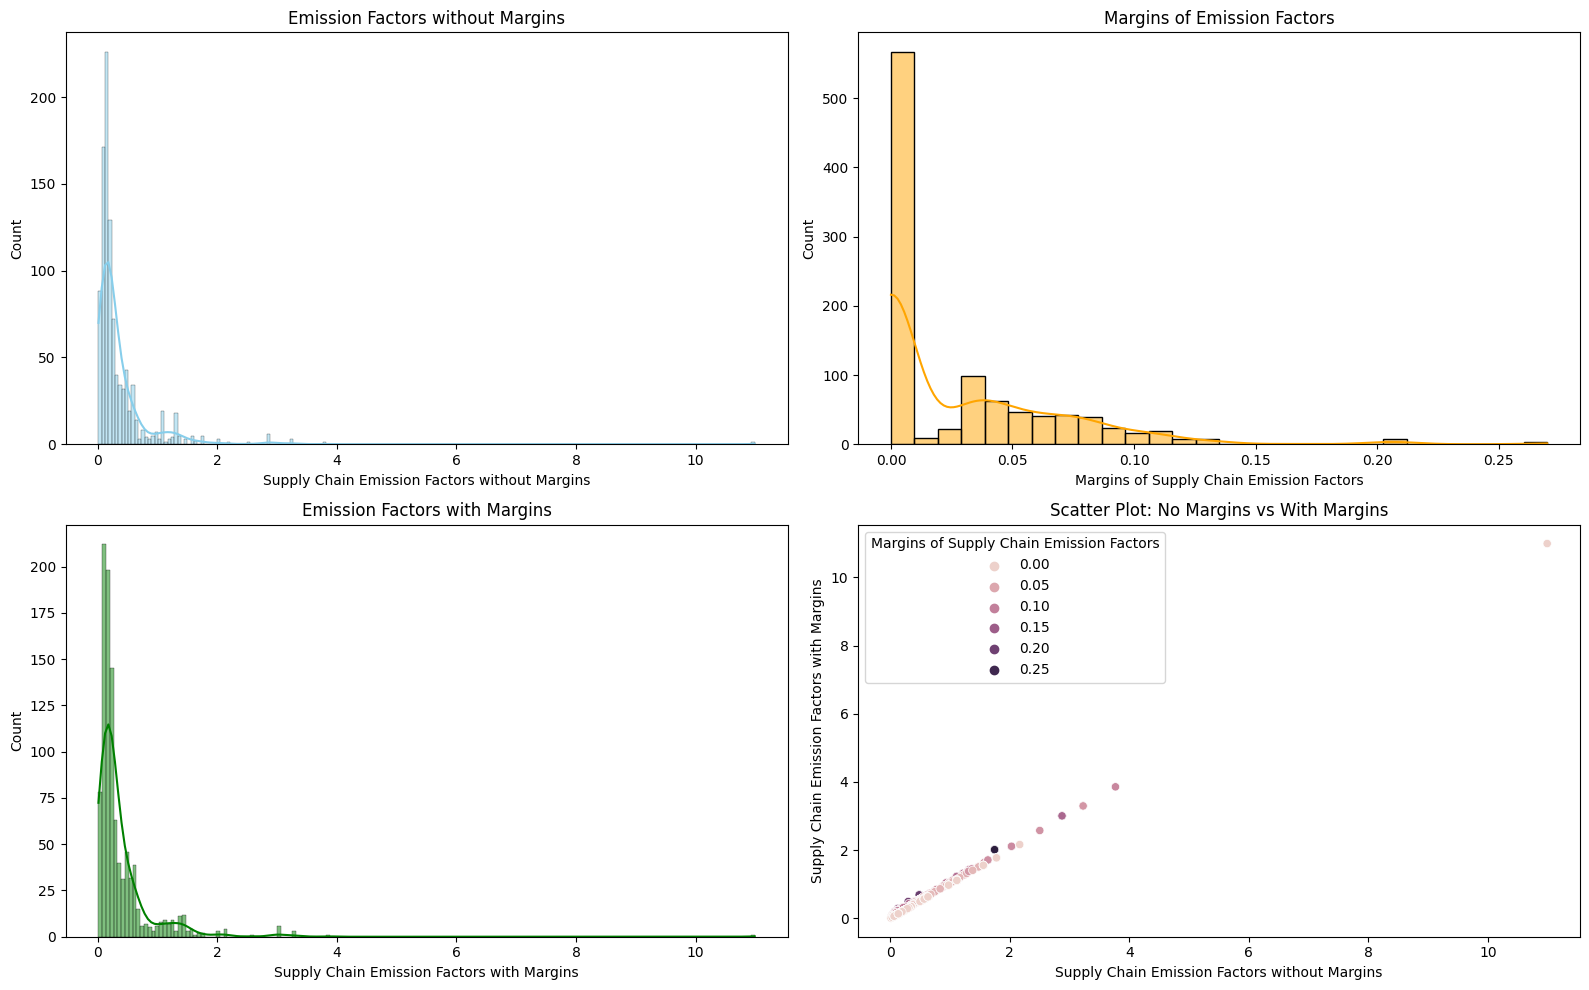

(       2017 NAICS Code  Supply Chain Emission Factors without Margins  \
 count      1016.000000                                     1016.00000   
 mean     424917.376969                                        0.35787   
 std      164942.113495                                        0.55562   
 min      111110.000000                                        0.01300   
 25%      325588.250000                                        0.12300   
 50%      423700.000000                                        0.18700   
 75%      532111.250000                                        0.40150   
 max      813990.000000                                       10.98900   
 
        Margins of Supply Chain Emission Factors  \
 count                               1016.000000   
 mean                                   0.028172   
 std                                    0.040568   
 min                                    0.000000   
 25%                                    0.000000   
 50%                

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select and rename for convenience
df_clean = df[[
    '2017 NAICS Code',
    '2017 NAICS Title',
    'Supply Chain Emission Factors without Margins',
    'Margins of Supply Chain Emission Factors',
    'Supply Chain Emission Factors with Margins'
]].copy()

# Drop rows with missing target
df_clean.dropna(subset=['Supply Chain Emission Factors with Margins'], inplace=True)

# Summary stats
summary_stats = df_clean.describe()

# Check for nulls
null_counts = df_clean.isnull().sum()

# Distribution plots
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_clean['Supply Chain Emission Factors without Margins'], kde=True, color='skyblue')
plt.title('Emission Factors without Margins')

plt.subplot(2, 2, 2)
sns.histplot(df_clean['Margins of Supply Chain Emission Factors'], kde=True, color='orange')
plt.title('Margins of Emission Factors')

plt.subplot(2, 2, 3)
sns.histplot(df_clean['Supply Chain Emission Factors with Margins'], kde=True, color='green')
plt.title('Emission Factors with Margins')

plt.subplot(2, 2, 4)
sns.scatterplot(
    x='Supply Chain Emission Factors without Margins',
    y='Supply Chain Emission Factors with Margins',
    hue='Margins of Supply Chain Emission Factors',
    data=df_clean
)
plt.title('Scatter Plot: No Margins vs With Margins')

plt.tight_layout()
plt.show()

summary_stats, null_counts
